In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
df = df.dropna(axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [13]:
df.sum()

id                                                               27131950191
member_id                                                        33777861189
loan_amnt                                                          445602650
funded_amnt                                                        434810325
funded_amnt_inv                                             412955476.680463
term                        36 months 60 months 36 months 36 months 60 mo...
int_rate                   10.65%15.27%15.96%13.49%12.69%7.90%15.96%18.64...
installment                                                      12890625.86
grade                      BCCCBACEFBCBCBBDCABACBBBBBCDBBAACACBBABBAADDAB...
sub_grade                  B2C4C5C1B5A4C5E1F2B5C3B5C1B1B2D1C4A1B3A1C4B4B3...
home_ownership             RENTRENTRENTRENTRENTRENTRENTRENTOWNRENTOWNOWNR...
annual_inc                                                     2739238848.92
verification_status        VerifiedSource VerifiedNot VerifiedSource Veri...

In [20]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [28]:
df = df.loc[:, df.sum() != 0]

In [29]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

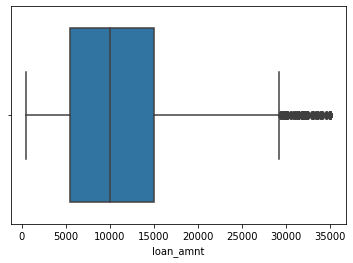

In [31]:
sns.boxplot(df['loan_amnt'])
plt.show()

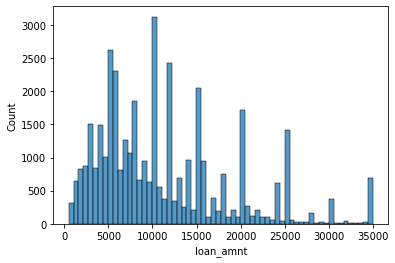

In [32]:
sns.histplot(df['loan_amnt'])
plt.show()

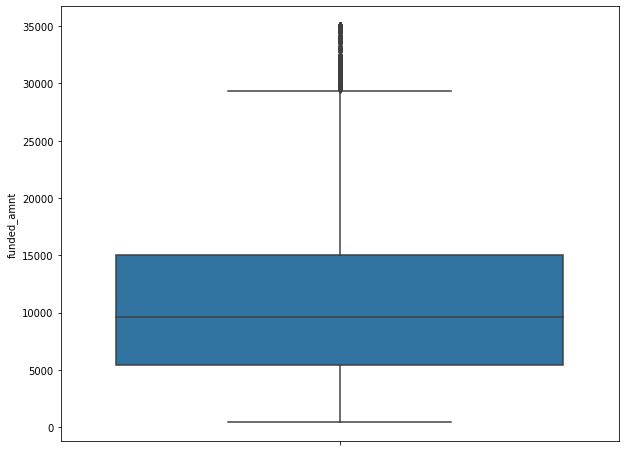

In [42]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['funded_amnt'])
plt.show()

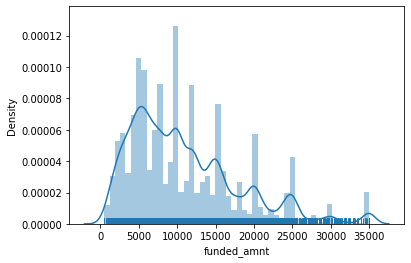

In [47]:
sns.distplot(df['funded_amnt'], rug=True)
plt.show()

In [44]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

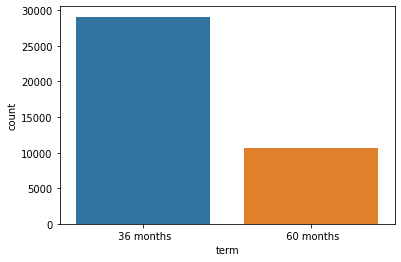

In [45]:
sns.countplot(df['term'])
plt.show()

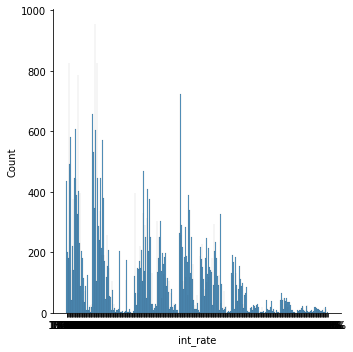

In [49]:
sns.displot(df['int_rate'])
plt.show()

In [51]:
sns.boxplot(df['int_rate'])
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

In [52]:
df['int_rate'].quantile([0, 0.5, 0.75, 1])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [53]:
df['int_rate'] = df['int_rate'].apply(lambda x: x.strip('%'))
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [55]:
sns.boxplot(df['int_rate'])
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

In [58]:
df['int_rate'].max()

'9.99'

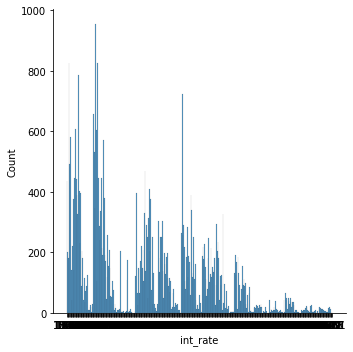

In [57]:
sns.displot(df['int_rate'])
plt.show()

In [61]:
df['int_rate'] = df['int_rate'].astype('float')

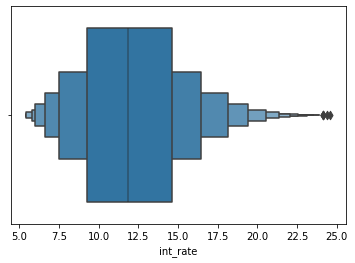

In [62]:
sns.boxenplot(df['int_rate'])
plt.show()

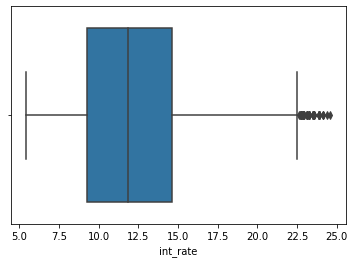

In [63]:
sns.boxplot(df['int_rate'])
plt.show()

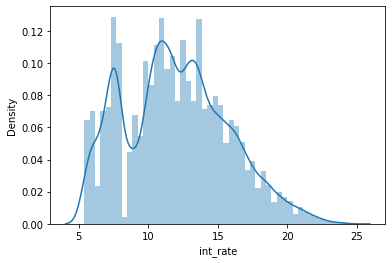

In [66]:
sns.distplot(df['int_rate'])
plt.show()

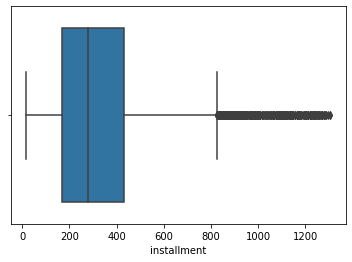

In [67]:
sns.boxplot(df['installment'])
plt.show()

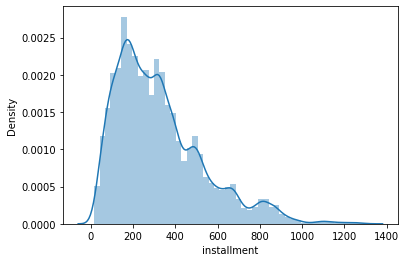

In [68]:
sns.distplot(df['installment'])
plt.show()

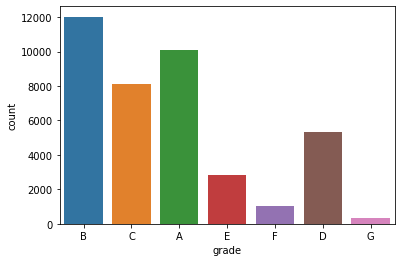

In [69]:
sns.countplot(df['grade'])
plt.show()

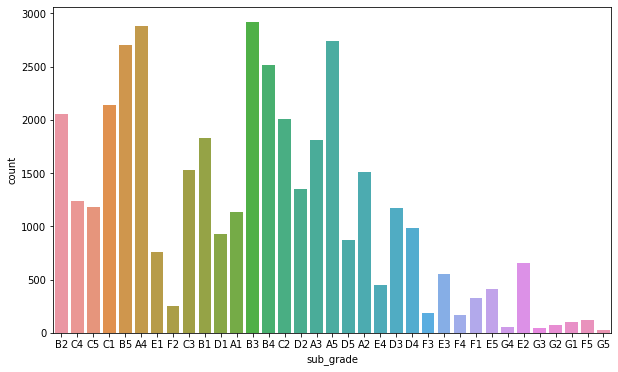

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(df['sub_grade'])
plt.show()

In [78]:
df['emp_title']

KeyError: 'emp_title'

In [79]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type'],
      dtype='object')

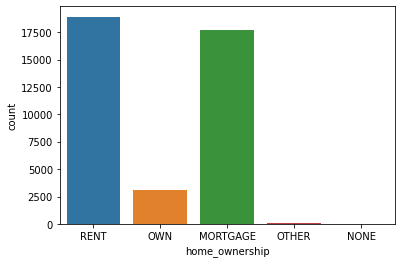

In [84]:
sns.countplot(df['home_ownership'])
plt.show()

In [82]:
df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

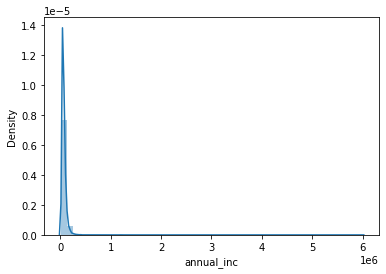

In [85]:
sns.distplot(df['annual_inc'])
plt.show()

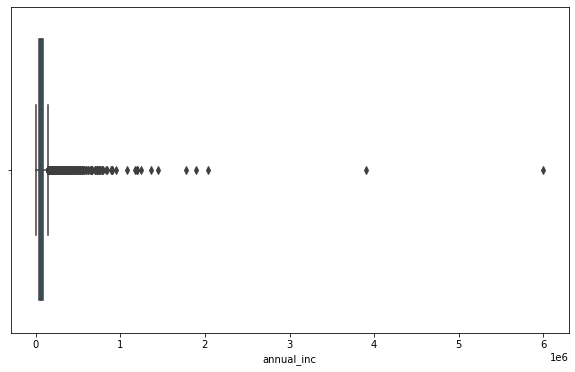

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(df['annual_inc'])
plt.show()

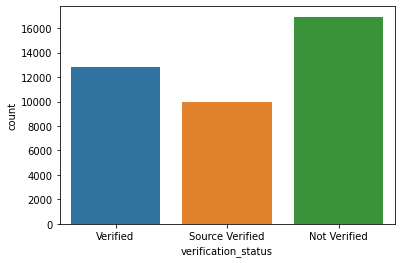

In [89]:
sns.countplot(df['verification_status'])
plt.show()

In [90]:
df['issue_d'].dtype

dtype('O')

In [103]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [106]:
df['issue_month'] = df['issue_d'].dt.month

In [107]:
df['issue_year'] = df['issue_d'].dt.year

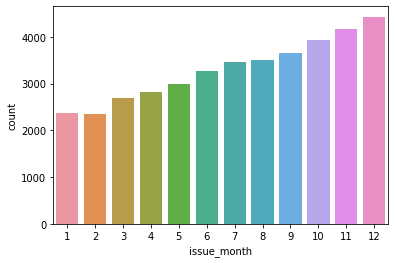

In [108]:
sns.countplot(df['issue_month'])
plt.show()

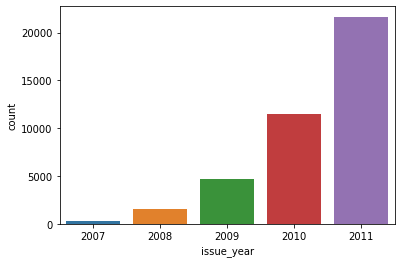

In [109]:
sns.countplot(df['issue_year'])
plt.show()

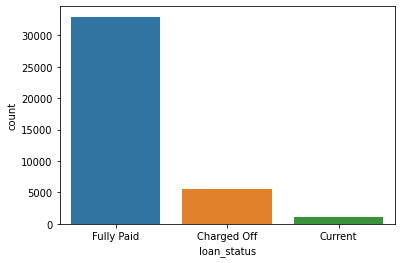

In [110]:
sns.countplot(df['loan_status'])
plt.show()

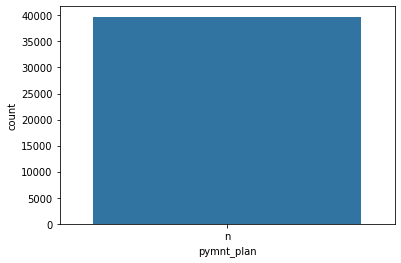

In [111]:
sns.countplot(df['pymnt_plan'])
plt.show()

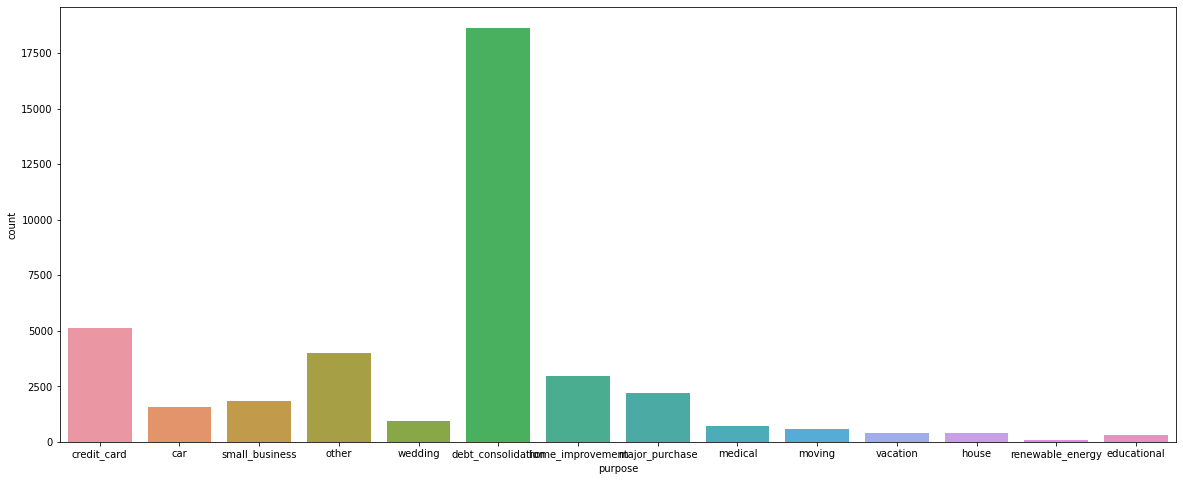

In [117]:
plt.figure(figsize=(20,8))
sns.countplot(df['purpose'])
plt.show()

In [118]:
df['title'].nunique

KeyError: 'title'

In [120]:
df['zip_code'].nunique()

823

In [121]:
df['addr_state'].nunique()

50

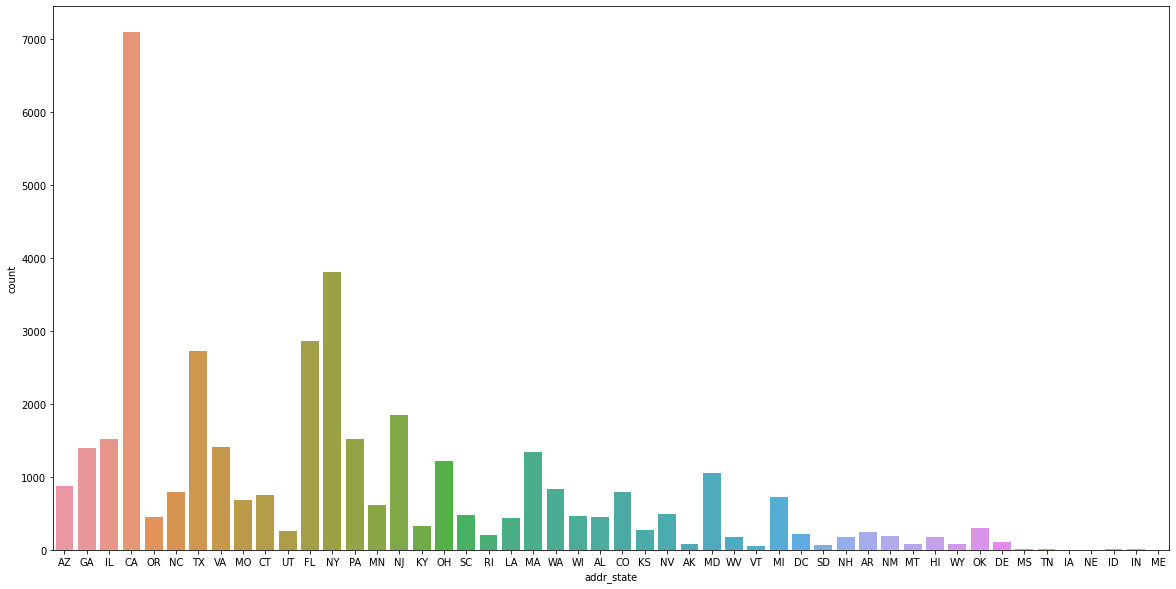

In [124]:
plt.figure(figsize=(20,10))
sns.countplot(df['addr_state'])
plt.show()

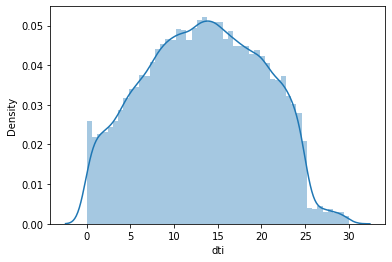

In [127]:
sns.distplot(df['dti'])
plt.show()

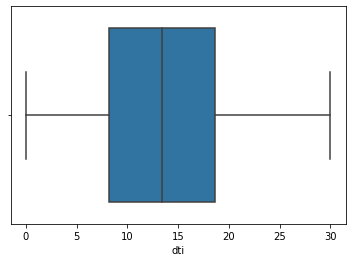

In [128]:
sns.boxplot(df['dti'])
plt.show()

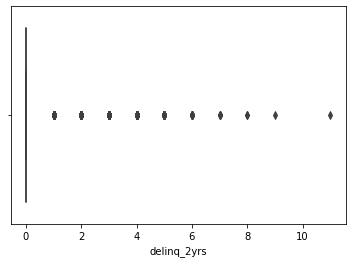

In [129]:
sns.boxplot(df['delinq_2yrs'])
plt.show()

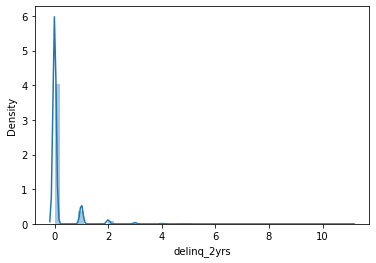

In [130]:
sns.distplot(df['delinq_2yrs'])
plt.show()

In [131]:
df['earliest_cr_line'].dtype

dtype('O')

In [137]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [138]:
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month

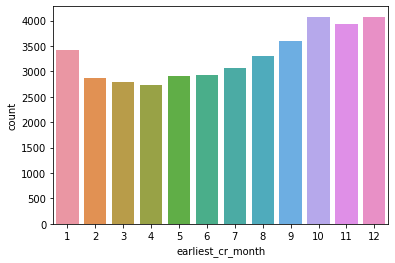

In [139]:
sns.countplot(df['earliest_cr_month'])
plt.show()

In [140]:
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

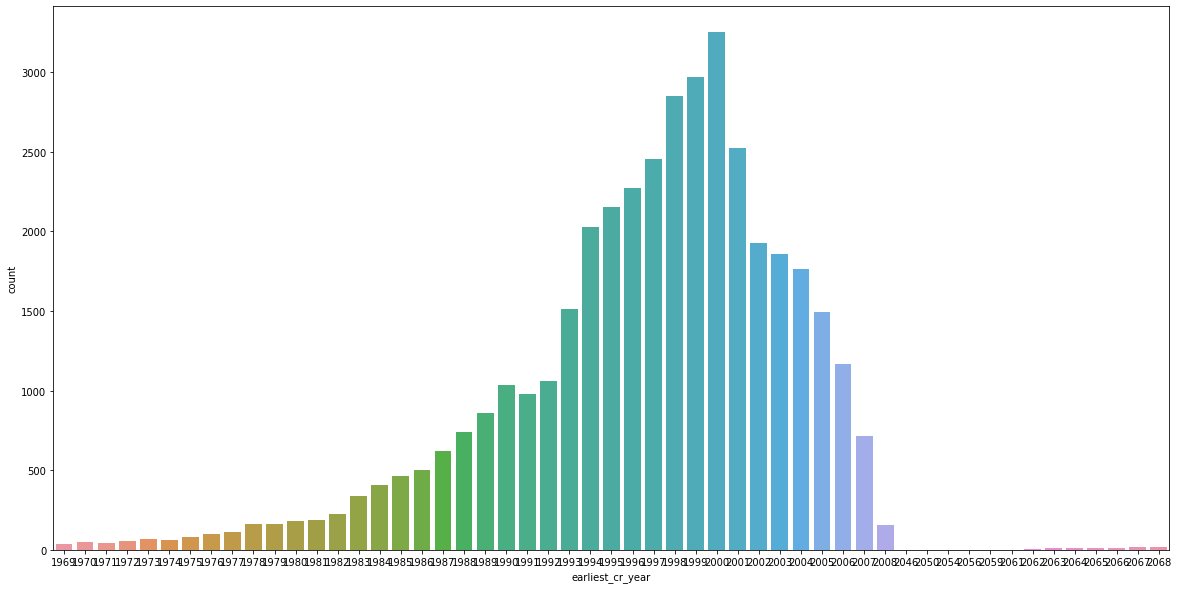

In [142]:
plt.figure(figsize=(20,10))
sns.countplot(df['earliest_cr_year'])
plt.show()

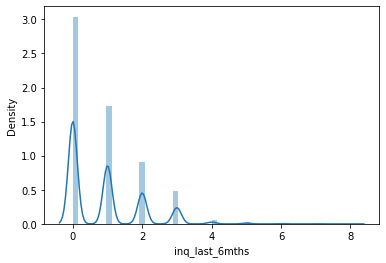

In [143]:
sns.distplot(df['inq_last_6mths'])
plt.show()

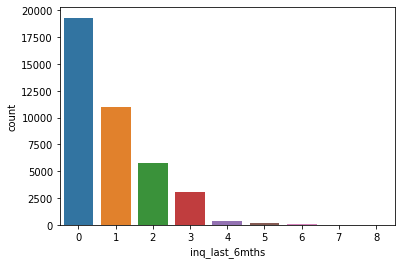

In [144]:
sns.countplot(df['inq_last_6mths'])
plt.show()

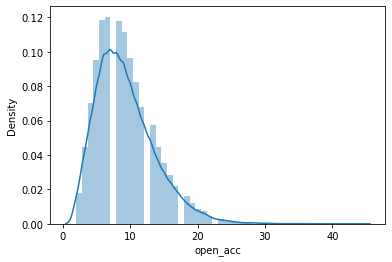

In [145]:
sns.distplot(df['open_acc'])
plt.show()

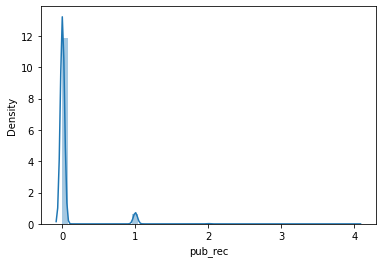

In [146]:
sns.distplot(df['pub_rec'])
plt.show()

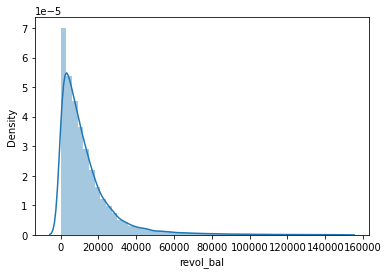

In [147]:
sns.distplot(df['revol_bal'])
plt.show()

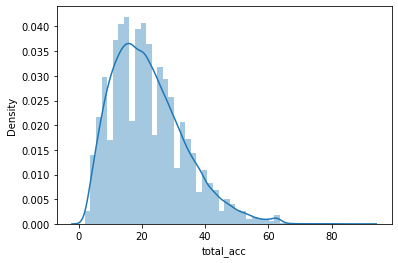

In [148]:
sns.distplot(df['total_acc'])
plt.show()

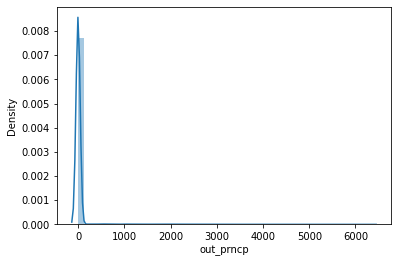

In [149]:
sns.distplot(df['out_prncp'])
plt.show()

In [150]:
len(df[df['out_prncp'] == df['out_prncp_inv']]) / len(df)

0.9860513130397562

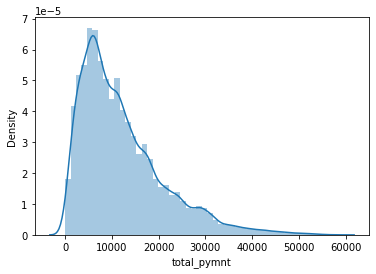

In [151]:
sns.distplot(df['total_pymnt'])
plt.show()

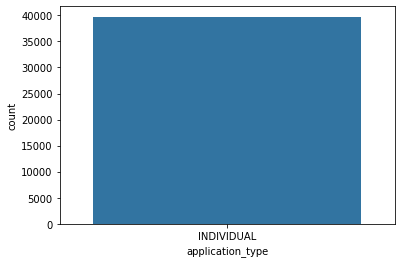

In [152]:
sns.countplot(df['application_type'])
plt.show()